# Instructions

Read carefully all the content in the cells, including the comments in the code cells

Some lines of code have been removed. You are asked to fill in the gaps.

Only modify lines that are between the following promts:

'# START YOUR CODE HERE >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

'# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE

After each cell there will be a test cell that will allow you to be confident you will be able to continue with the execution of the notebook.

Here's an example

In [1]:
# This is just a test to illustrate how we will do exercises with jupyter notebooks

# This function adds two numbers and prints the result
# Please fill in the gaps

def print_sum(a, b):

    # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
    c = a + b
    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE

    print(c)

    return

In [2]:
# Run this cell to check that the above implementation is correct
print_sum(1, 2)

3


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** print_sum(1,2) **</td> 
        <td>3 </td> 
    </tr>

</table>

# Newton's laws of motions

In this notebook, we are going to keep practicing how to code in Python, and use notebooks as a coding / development environment, to solve simple problems using Newton's laws of motion.

In particular, we are going to see how to solve a problem you may have already encountered in school: figuring out which angle to throw a ball at to maximize the distance it reaches when falling on the ground.

These are the simplifying hypothesis we will use:

1. The ball's dimensions and geometry are not relevant for the problem (it is very small compared to the distance travelled): we will consider it to be a point particle with mass $m$.

2. The Earth is flat (we are not launching a rocket with a range comparable to its radius). We will also consider that the force of gravity is constant, with its acceleration equal to $g=9.81\,\rm m \, s^{-2}$.

3. There is no atmosphere, so we will not consider the effect of air resistance.

4. The ball is initially launched with a velocity $v_0$ at an angle $\theta$ from the horizontal.

Under these assumptions, the motion of the ball is determined by Newton's second law of motion:

$$\mathbf{F} = m \mathbf{a}$$

Let's set up a coordinate system, with the $x$ axis parallel to the ground and pointing towards the initial velocity of the ball, and the $y$ axis perpendicular to the ground pointing upwards. The $z$ axis is set so that $\{x,y,z\}$ is a right-handed coordinate system. The components of the equations of motion are then:

$$a_x = 0 \\ a_y = -g \\ a_z = 0$$

If we solve these equations, we can find the ball's coordinates as a function of time:

$$\{x(t), y(t), z(t)\}$$

From which we can compute the distance traveled by the time the ball hits the ground. 

We will follow two approaches:

  a. This system of equations has an analytic solution. We will compute it and use it to solve the problem.
  b. We will solve it numerically, following an approach that can be used for more general problems, for which there is no analytic solution.

## a. Analytic solution

Let's use the definition of acceleration and velocity to integrate the equations of motion. First, integrating the acceleration we get the velocity (since the acceleration is the derivative of the velocity):

$$a_x \equiv \frac{d v_x}{d t} = 0 \\ a_y \equiv \frac{d v_y}{d t} = -g \\ a_z \equiv \frac{d v_z}{d t} = 0 $$

The derivative of a straight line is its slope:

$$\frac{d}{d x} \left(a x + b \right) = a$$

Then:

$$ v_x = v_{x0} \\ v_y = -g t + v_{y0} \\ v_z = v_{z0} $$

Since there is no force along the $y$ and $z$ axes (due to our choice of reference frame), there is no acceleration, and the velocity of the ball does not change (it keeps the same value it was launched with). A constant force (in this case, along the $y$ axis) induces a linear change in te velocity.

Now, we can integrate again to find the position:

$$ v_x \equiv \frac{d x}{d t} \rightarrow x = v_{x0} t + x_0 \\
   v_y \equiv \frac{d y}{d t} \rightarrow y = -\frac{g}{2} t^2 + v_{y0} t + y_0 \\
   v_z \equiv \frac{d z}{d t} \rightarrow z = v_{z0} t + z_0$$

Constant velocities induce linear changes in positions. Linear velocities induce quadratic changes in positions. 

The initial velocity of the ball is:

$$v_{x0} = v_0 \cos \theta \\ v_{y0} = v_0 \sin \theta \\ v_{z0} = 0$$

The initial position of the ball is:

$$ \{x_0, y_0, z_0\} = \{0,0,0\}$$

Substituting, the equations of motion are:

$$x = v_0 \cos (\theta) t \\ y = -\frac{g}{2}t^2 + v_0 \sin (\theta) t \\ z = 0$$

We can compute the position of the ball with time, and plot it using Python.



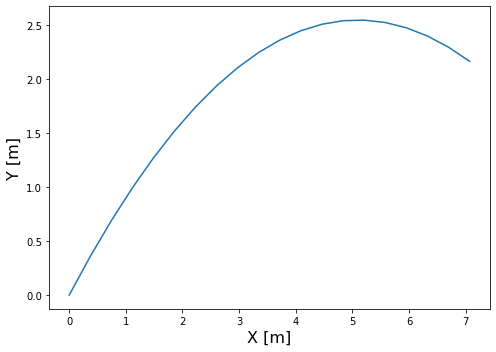

In [3]:
import numpy as np                # use arrays
import matplotlib.pyplot as plt   # plot
%matplotlib inline

# Set up the initial conditions, we will assume all magnitudes are in SI units
# and angles are in degrees
v0 = 10
theta = 45

# Trigonometric functions take arguments in radians
deg2rad = np.pi / 180

# The value of gravity is fixed
g = 9.81

# Set up the times at which we want to evaluate the position of the ball
tmin, tmax, nts = 0, 1, 20
ts = np.linspace(tmin, tmax, nts)

# Compute the positions
xs = v0 * np.cos(theta * deg2rad) * ts
ys = - g * ts**2 / 2 + v0 * np.sin(theta * deg2rad) * ts
zs = 0

# Plot them
font = 16   # set font size

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, ys)
ax.set_xlabel(r"X [m]", fontsize=font), ax.set_ylabel(r"Y [m]", fontsize=font)
plt.tight_layout()

We can see how the trajectory is a parabola, in which the ball gains height, then turn over and falls while it advances horizontally at constant speed.

In general, it is better to package the code using functions for re-usability. This way we can use the same code to solve many different problems. It makes sense to use a version of the equations prior to performing any substitutions.

In [4]:
# First, let's code a helper function that gives us the velocity components
# given the speed and aim angle
def initial_velocity(v0, theta):
    '''Returns velocity components given speed and angle with horizontal'''
    import numpy as np

    deg2rad = np.pi / 180
    v0_x = v0 * np.cos(theta * deg2rad)

    # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
    v0_y = v0 * np.sin(theta * deg2rad)
    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE

    v0_z = 0

    return v0_x, v0_y, v0_z

# Second, let's create a function that gives the position of the ball at a
# given time t


def parabolic_positions(t, r0, v0):
    '''Returns positions at time t given initial positions r0 and velocities v0'''

    # define gravitational constant
    g = 9.81

    # unpackage inputs
    x0 = r0[0]
    y0 = r0[1]
    z0 = r0[2]
    vx0 = v0[0]
    vy0 = v0[1]
    vz0 = v0[2]

    x = vx0 * t + x0

    # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
    y = -g * t**2 / 2 + vy0 * t + y0
    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE

    z = vz0 * t + z0

    return x, y, z

In [5]:
# Let's test the output for the initial velocity helper function
initial_velocity(10, 45)

(7.0710678118654755, 7.071067811865475, 0)

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** initial_velocity(10, 45) **</td> 
        <td>(7.0710678118654755, 7.071067811865475, 0) </td> 
    </tr>

</table>

In [6]:
# Let's test the output for the computation of parabolic positions
parabolic_positions(0.5, (0, 0, 0), (5, 5, 0))

(2.5, 1.27375, 0.0)

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** parabolic_positions(0.5, (0,0,0), (5,5,0)) **</td> 
        <td>(2.5, 1.27375, 0.0) </td> 
    </tr>

</table>

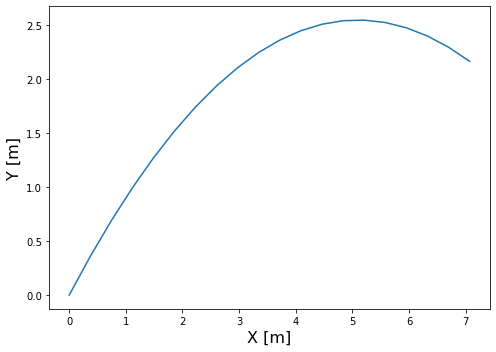

In [7]:
# Let's verify that we get the same result we got before with the
# direct calculation

# Now we can initialize the positions and velocities as
r_t0 = (0, 0, 0)
v_t0 = initial_velocity(10, 45)

# Determine the same times as before

# And get the coordinates with a call to the function
xs, ys, zs = parabolic_positions(ts, r_t0, v_t0)

# Plot result
font = 16   # set font size

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, ys)
ax.set_xlabel(r"X [m]", fontsize=font), ax.set_ylabel(r"Y [m]", fontsize=font)
plt.tight_layout()

The question is which launch angle we need to maximize the height. We can see that the solution in this case can be found analytically. There are two times at which the ball is on the floor, the initial one, $t_0=0$ and the final one:

$$y(t_f) = 0 \rightarrow t_f = \frac{2 v_0 \sin \theta}{g}$$

The higher the initial vertical velocity, the longer the ball stays in the air, and the stronger the gravity, the less time the ball stays in the air.

The maximum reach is then the $x$ position at that time:

$$x_{max} = \frac{2 v_0^2 \sin \theta \cos \theta}{g} = \frac{v_0^2 \sin(2\theta)}{g}$$

The maximum of this function is achieved when:

$$\sin(2\theta) = 1 \rightarrow \theta = \frac{\pi}{4} \equiv 45 \rm deg$$

And the value for that reach is:

$$x_{max} = \frac{v_0^2}{g}$$

Check that the units make sense (it has units of lenght)

In [8]:
# We can validate it using the functions we had before

# Let's add first another helper function that gives the time-on-air

def flight_time(v_0, theta):
    import numpy as np

    deg2rad = np.pi / 180
    g = 9.81

    # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
    t_f = 2 * v_0 * np.sin(theta * deg2rad) / g
    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE

    return t_f

In [9]:
# Let's test the output for the flight_time helper function
flight_time(10, 45)

1.4416040391163047

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** flight_time(10, 45) **</td> 
        <td>1.4416040391163047 </td> 
    </tr>

</table>

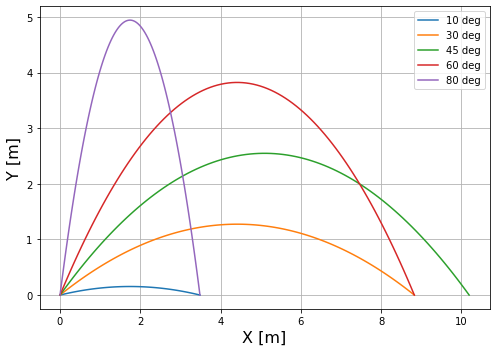

In [10]:
# We are going to plot the trajectories, of a series of launchs that start
# with different angles
thetas = [10, 30, 45, 60, 80]

# We will keep the initial speed fixed
v_0 = 10

# Compute, and plot, each trajectory
font = 16   # set font size

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(r"X [m]", fontsize=font), ax.set_ylabel(r"Y [m]", fontsize=font)

for theta in thetas:
    v_t0 = initial_velocity(v_0, theta)

    ts = np.linspace(0, flight_time(v_0, theta), 100)

    xs, ys, zs = parabolic_positions(ts, (0, 0, 0), v_t0)

    ax.plot(xs, ys, label=r"{} deg".format(theta))

ax.legend(), ax.grid()
plt.tight_layout()

In [11]:
# As we did in the week 1 notebook, we can actually animate this
# plot to, interactively, see the influence of the angle on the reach

from ipywidgets import interactive       # make interactive plots

# These properties are common to all the plots
r_0 = (0, 0, 0)
v_0 = 10

# Define the values for the parameters we want to visualize
theta_min, theta_max = 1, 89
theta_step = 5


def f(theta):
    # initialize velocity
    v_t0 = initial_velocity(v_0, theta)
    # compute the flight time
    t_f = flight_time(v_0, theta)
    ts = np.linspace(0, t_f, 100)
    # compute the ball's positions
    xs, ys, zs = parabolic_positions(ts, r_0, v_t0)
    # compute the maximum distances for scaling
    x_max = v_0**2 / g
    y_max = v_0**2 / g / 2
    # plot
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xs, ys)
    ax.set_xlim((0, x_max)), ax.set_ylim((0, y_max))
    ax.set_xlabel(r"X [m]"), ax.set_ylabel(r"Y [m]")
    plt.tight_layout()
    plt.show()


# Output interactive plot
interactive_plot = interactive(f, theta=(theta_min, theta_max, theta_step))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=41, description='theta', max=89, min=1, step=5), Output(layout=Layout(he…

## b. Numeric approach

In general, the differential equations of motion do not have an analytical solution, but we can compute one numerically. The method we are going to use here is not how it is usually done (there are far better methods), but it is the simplest to illustrate the principles behind the numerical solution of differential equations.

In general, we want to solve equations of the form:

$$\frac{dy}{dt} = f(y, t)$$

We can start with a known initial condition:

$$y(t_0) = y_0$$

Then, the solution for another time, close to the initial time, can be approximated as:

$$y(t_1) \approx y(t_0) + \Delta y |_0 = y(t_0) + \frac{\Delta y}{\Delta t}|_0  \Delta t= y_0 + f(y_0, t_0) \Delta t$$

And iteratively, we can compute the solution at any point in time using the solution at a previous point in time, and evaluating the function $f$ at that point in time:

$$y(t_{i+1}) \approx  y_i + f(y_i, t_i) \Delta t$$

Let's implement such a function, and use it to solve our problem:

We can decompose our problem in the following steps:


  1. Using the velocity, compute the new position at the next point
  $$\mathbf{x}_i = \mathbf{x}_{i-1} + \mathbf{v}_{i-1} * \Delta t$$

  2. Using the acceleration, compute the new velocity
  $$\mathbf{v}_i = \mathbf{v}_{i-1} + \mathbf{a}_{i-1} * \Delta t$$



In [12]:
def parabolic_positions_numeric(t, r0, v0):

    import numpy as np

    # as before t is an array with times, let's initialize the outputs
    xs = np.zeros(len(t))
    ys = np.zeros(len(t))
    zs = np.zeros(len(t))

    # we start at the initial condition
    xs[0] = r0[0]
    ys[0] = r0[0]
    zs[0] = zs[0]

    # with the initial velocity
    vx = v0[0]
    vy = v0[1]
    vz = v0[2]

    # let's iterate to compute the positions at all subsequent points in time
    for i in range(1, len(t)):
        # compute the time step
        dt = t[i] - t[i-1]
        # update positions with velocity
        xs[i] = xs[i-1] + vx * dt
        ys[i] = ys[i-1] + vy * dt
        zs[i] = zs[i-1] + vz * dt
        # update velocity with acceleration
        vx = vx
        vy = vy - g * dt
        vz = vz

    return xs, ys, zs

In [13]:
# The precision of the approximation will depend on the time step used
# Let's see that with an interactie plot

# common parameters that will not change
r_t0 = (0, 0, 0)
v_t0 = initial_velocity(10, 45)
t_f = flight_time(10, 45)

# parameters that we want to change
min_time_steps = 5
max_time_steps = 100
change_time_steps = 5


def f(time_steps):
    # compute the times that correspond to the number of time steps desired
    ts_a = np.linspace(0, t_f, 100)
    ts_n = np.linspace(0, t_f, time_steps)
    # compute the positions using the exact, analytic formula
    xs_a, ys_a, zs_a = parabolic_positions(ts_a, r_t0, v_t0)
    # compute the positions using the approximate, numeric method
    xs_n, ys_n, zs_n = parabolic_positions_numeric(ts_n, r_t0, v_t0)

    # plot
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xs_a, ys_a, 'k-', label='exact')
    ax.plot(xs_n, ys_n, 'b-', label='approximate')
    ax.legend()

    plt.tight_layout()
    plt.show()


# Output interactive plot
interactive_plot = interactive(f, time_steps=(min_time_steps, max_time_steps,
                                              change_time_steps))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=50, description='time_steps', min=5, step=5), Output(layout=Layout(heigh…

We see how the numeric approximation tends to overshoot the exact solution, and needs many time steps (around 500) to fit the known solution.

This is because we are using a poor numeric approximation. For example, to propagate the position in y we are using the vertical position in the previous position, which is the maximum vertical velocity as the ball moves in that time interval. 

A simple improvement would be to update the velocity first, to the average between the velocity at the beginning and the end of the interval:

  1. Using half the acceleration, compute the new velocity
  $$\mathbf{v}_i = \mathbf{v}_{i-1} + 0.5 * \mathbf{a}_{i-1} * \Delta t$$

  2. Using the velocity, compute the new position at the next point
  $$\mathbf{x}_i = \mathbf{x}_{i-1} + \mathbf{v}_{i-1} * \Delta t$$

  3. Using half the acceleration, update the new velocity
  $$\mathbf{v}_i = \mathbf{v}_{i-1} + 0.5 * \mathbf{a}_{i-1} * \Delta t$$

This scheme is called "leap frog" and it improves numerical convergence dramatically

In [14]:
def parabolic_positions_numeric(t, r0, v0):

    import numpy as np

    # as before t is an array with times, let's initialize the outputs
    xs = np.zeros(len(t))
    ys = np.zeros(len(t))
    zs = np.zeros(len(t))

    # we start at the initial condition
    xs[0] = r0[0]
    ys[0] = r0[0]
    zs[0] = zs[0]

    # with the initial velocity
    vx = v0[0]
    vy = v0[1]
    vz = v0[2]

    # let's iterate to compute the positions at all subsequent points in time
    for i in range(1, len(t)):
        # compute the time step
        dt = t[i] - t[i-1]
        # update velocity with half acceleration
        vx = vx
        vy = vy - g * dt / 2
        vz = vz
        # update positions with velocity
        xs[i] = xs[i-1] + vx * dt
        ys[i] = ys[i-1] + vy * dt
        zs[i] = zs[i-1] + vz * dt
        # update velocity again with half acceleration

        # START YOUR CODE HERE (3 lines of code)>>>>>>>>>>>>>>>>>>
        vx = vx
        vy = vy - g * dt / 2
        vz = vz
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE

    return xs, ys, zs

In [15]:
# Let's test the output for the flight_time helper function
parabolic_positions_numeric([0, 0.2], (0, 0, 0), (5, 5, 0))

(array([0., 1.]), array([0.    , 0.8038]), array([0., 0.]))

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** parabolic_positions_numeric([0, 0.2], (0,0,0), (5,5,0)) **</td> 
        <td>(array([0., 1.]), array([0.    , 0.8038]), array([0., 0.])) </td> 
    </tr>

</table>

In [16]:
# Let's see how the numeric precision with this improved method is so much
# better

# common parameters that will not change
r_t0 = (0, 0, 0)
v_t0 = initial_velocity(10, 45)
t_f = flight_time(10, 45)

# parameters that we want to change
min_time_steps = 5
max_time_steps = 100
change_time_steps = 5


def f(time_steps):
    # compute the times that correspond to the number of time steps desired
    ts_a = np.linspace(0, t_f, 100)
    ts_n = np.linspace(0, t_f, time_steps)
    # compute the positions using the exact, analytic formula
    xs_a, ys_a, zs_a = parabolic_positions(ts_a, r_t0, v_t0)
    # compute the positions using the approximate, numeric method
    xs_n, ys_n, zs_n = parabolic_positions_numeric(ts_n, r_t0, v_t0)

    # plot
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xs_a, ys_a, 'k-', label='exact')
    ax.plot(xs_n, ys_n, 'b-', label='approximate')
    ax.legend()

    plt.tight_layout()
    plt.show()


# Output interactive plot
interactive_plot = interactive(f, time_steps=(min_time_steps, max_time_steps,
                                              change_time_steps))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=50, description='time_steps', min=5, step=5), Output(layout=Layout(heigh…

See how the performance improves tremendously, and now only ~20 time steps suffice to get an answer that is essentially the same as the exact solution.

### Adding air drag to our problem

+ The big advantage of using a numerical approach, is that now we can solve problems that are more complex, and for which we do not have a good analytic solution.

+ For example, let's remove the simplifying assumption about air drag. Let's now suppose that the ball experiences a drag that is proportional to its speed, and oposses it:

$$\mathbf{F_D} = - C_D \mathbf{v}$$

+ Now, we can modify the numeric function just changing the acceleration term:



In [17]:
def parabolic_positions_numeric_drag(t, r0, v0, c_d=0):

    import numpy as np

    g = 9.81

    # as before t is an array with times, let's initialize the outputs
    xs = np.zeros(len(t))
    ys = np.zeros(len(t))
    zs = np.zeros(len(t))

    # we start at the initial condition
    xs[0] = r0[0]
    ys[0] = r0[0]
    zs[0] = zs[0]

    # with the initial velocity
    vx = v0[0]
    vy = v0[1]
    vz = v0[2]

    # let's iterate to compute the positions at all subsequent points in time
    for i in range(1, len(t)):
        # compute the time step
        dt = t[i] - t[i-1]
        # update velocity with half acceleration
        vx = vx - c_d * vx * dt / 2
        vy = vy - c_d * vy * dt / 2 - g * dt / 2
        vz = vz - c_d * vz * dt / 2
        # update positions with velocity
        xs[i] = xs[i-1] + vx * dt
        ys[i] = ys[i-1] + vy * dt
        zs[i] = zs[i-1] + vz * dt
        # update velocity again with half acceleration
        vx = vx - c_d * vx * dt / 2
        vy = vy - c_d * vy * dt / 2 - g * dt / 2
        vz = vz - c_d * vz * dt / 2

    return xs, ys, zs

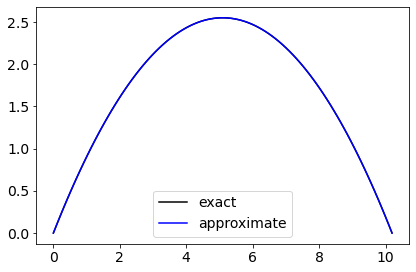

In [18]:
# First, let's check that when the drag coefficient is zero, the solution is the
# same as with the analytic one

r_t0 = (0, 0, 0)
v_t0 = initial_velocity(10, 45)
t_f = flight_time(10, 45)

# Let's use 100 time steps, to guarantee numerical convergence
ts = np.linspace(0, t_f, 100)

# compute the positions using the exact, analytic formula
xs_a, ys_a, zs_a = parabolic_positions(ts, r_t0, v_t0)
# compute the positions using the approximate, numeric method
xs_n, ys_n, zs_n = parabolic_positions_numeric_drag(ts, r_t0, v_t0, c_d=0)

# plot
plt.rcParams.update({'font.size': 14})
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs_a, ys_a, 'k-', label='exact')
ax.plot(xs_n, ys_n, 'b-', label='approximate')
ax.legend()

plt.tight_layout()
plt.show()

In [19]:
# Now, let's explore the impact of the drag coefficient
# Let's see that with an interactie plot

# common parameters that will not change
r_t0 = (0, 0, 0)
v_t0 = initial_velocity(10, 45)
t_f = flight_time(10, 45)

ts = np.linspace(0, t_f, 100)

# parameters that we want to change
min_drag = 0
max_drag = 1
change_drag = 0.1


def f(drag):
    # compute the positions using the exact, analytic formula
    xs_a, ys_a, zs_a = parabolic_positions(ts, r_t0, v_t0)
    # compute the positions using the approximate, numeric method
    xs_n, ys_n, zs_n = parabolic_positions_numeric_drag(ts, r_t0, v_t0, drag)

    # plot
    plt.rcParams.update({'font.size': 14})
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xs_a, ys_a, 'k-', label='no-drag')
    ax.plot(xs_n[ys_n >= 0], ys_n[ys_n >= 0], 'b-', label='drag')
    ax.set_xlabel(r"X [m]"), ax.set_ylabel(r"Y [m]")
    ax.legend(loc=1)

    plt.tight_layout()
    plt.show()


# Output interactive plot
interactive_plot = interactive(f, drag=(min_drag, max_drag, change_drag))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='drag', max=1.0), Output(layout=Layout(height='350px'…

See how air drag reduces both the reach of the ball, and its maximum height. The numeric approach allows us to solve this problem with little complexity added relative to the case without drag.

Ideally, you would code separate functions for the integration and the evaluation of the acceleration, so that you can use the same integration function with different accelerations.

In practice, you would not code your own integration function, but use one from a library, since there are implementations that have been thoroughly tested for numeric accuracy and computing time efficiency.